# `ANALISIS EXPLORATORIO DE DATOS (EDA)`

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings("ignore")

Importamos las librerias

In [32]:
taxis_2023 = pd.read_parquet('Taxis_2023_reducido.parquet')

In [33]:
taxis_2023

,PULocationID,Borough,Zone,service_zone,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,DOLocationID,total_amount
2387677,170,Manhattan,Murray Hill,Yellow Zone,2023-01-26 22:17:52,2023-01-26 22:41:59,2.0,4.09,87,34.22
1294994,140,Manhattan,Lenox Hill East,Yellow Zone,2023-06-16 21:35:55,2023-06-16 21:40:57,1.0,1.71,233,17.16
2517077,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone,2023-01-15 17:54:57,2023-01-15 18:11:31,1.0,1.50,137,22.65
1589964,142,Manhattan,Lincoln Square East,Yellow Zone,2023-04-11 08:37:16,2023-04-11 08:43:07,1.0,0.49,142,11.20
3525080,239,Manhattan,Upper West Side South,Yellow Zone,2023-01-26 20:14:50,2023-01-26 20:19:43,1.0,0.88,239,13.22
...,...,...,...,...,...,...,...,...,...,...
1460075,141,Manhattan,Lenox Hill West,Yellow Zone,2023-01-06 14:46:29,2023-01-06 15:01:24,1.0,1.68,142,20.02
1861560,161,Manhattan,Midtown Center,Yellow Zone,2023-04-17 20:51:35,2023-04-17 21:02:25,2.0,2.13,249,20.47
1791862,161,Manhattan,Midtown Center,Yellow Zone,2023-07-29 13:12:01,2023-07-29 13:20:24,1.0,1.20,164,15.10
1593335,143,Manhattan,Lincoln Square West,Yellow Zone,2023-03-20 14:44:19,2023-03-20 14:51:09,1.0,1.09,142,12.60


In [34]:
# Dividimos la columna 'tpep_pickup_datetime' en 'date_pickup' y 'time_pickup'

taxis_2023['date_pickup'] = pd.to_datetime(taxis_2023['tpep_pickup_datetime']).dt.date
taxis_2023['time_pickup'] = pd.to_datetime(taxis_2023['tpep_pickup_datetime']).dt.time

# Dividimos la columna 'tpep_dropoff_datetime' en 'date_dropoff' y 'time_dropoff'

taxis_2023['date_dropoff'] = pd.to_datetime(taxis_2023['tpep_dropoff_datetime']).dt.date
taxis_2023['time_dropoff'] = pd.to_datetime(taxis_2023['tpep_dropoff_datetime']).dt.time

# Eliminar la columna 'datetime' original si es necesario
taxis_2023.drop(columns=['tpep_pickup_datetime'], inplace=True)
taxis_2023.drop(columns=['tpep_dropoff_datetime'], inplace=True)

VALORES NULOS

In [35]:
#Contamos cuantos nulos hay por columna
taxis_2023.isnull().sum()

PULocationID           0
Borough                0
Zone                   0
service_zone           0
passenger_count    27998
trip_distance          0
DOLocationID           0
total_amount           0
date_pickup            0
time_pickup            0
date_dropoff           0
time_dropoff           0
dtype: int64

In [36]:
#Eliminamos los valores nulos ya que no son significantes para nuestro df
taxis_2023.dropna(inplace=True)

In [37]:
#Observamos los tipos de datos del df
taxis_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972002 entries, 2387677 to 727469
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PULocationID     972002 non-null  int64  
 1   Borough          972002 non-null  object 
 2   Zone             972002 non-null  object 
 3   service_zone     972002 non-null  object 
 4   passenger_count  972002 non-null  float64
 5   trip_distance    972002 non-null  float64
 6   DOLocationID     972002 non-null  int64  
 7   total_amount     972002 non-null  float64
 8   date_pickup      972002 non-null  object 
 9   time_pickup      972002 non-null  object 
 10  date_dropoff     972002 non-null  object 
 11  time_dropoff     972002 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 96.4+ MB


In [38]:
# Cambiamos las fechas y horas a tipo de dato datatime
taxis_2023['date_pickup'] = pd.to_datetime(taxis_2023['date_pickup'], format='%Y-%m-%d')
taxis_2023['date_dropoff'] = pd.to_datetime(taxis_2023['date_dropoff'], format='%Y-%m-%d')
taxis_2023['time_pickup'] = pd.to_datetime(taxis_2023['time_pickup'], format='%H:%M:%S')
taxis_2023['time_dropoff'] = pd.to_datetime(taxis_2023['time_dropoff'], format='%H:%M:%S')

DUPLICADOS

In [39]:
# Buscamos filas con valores duplicados
duplicados = taxis_2023[taxis_2023.duplicated()] 
duplicados

#No hay dulpicados

,PULocationID,Borough,Zone,service_zone,passenger_count,trip_distance,DOLocationID,total_amount,date_pickup,time_pickup,date_dropoff,time_dropoff


OUTLIERS

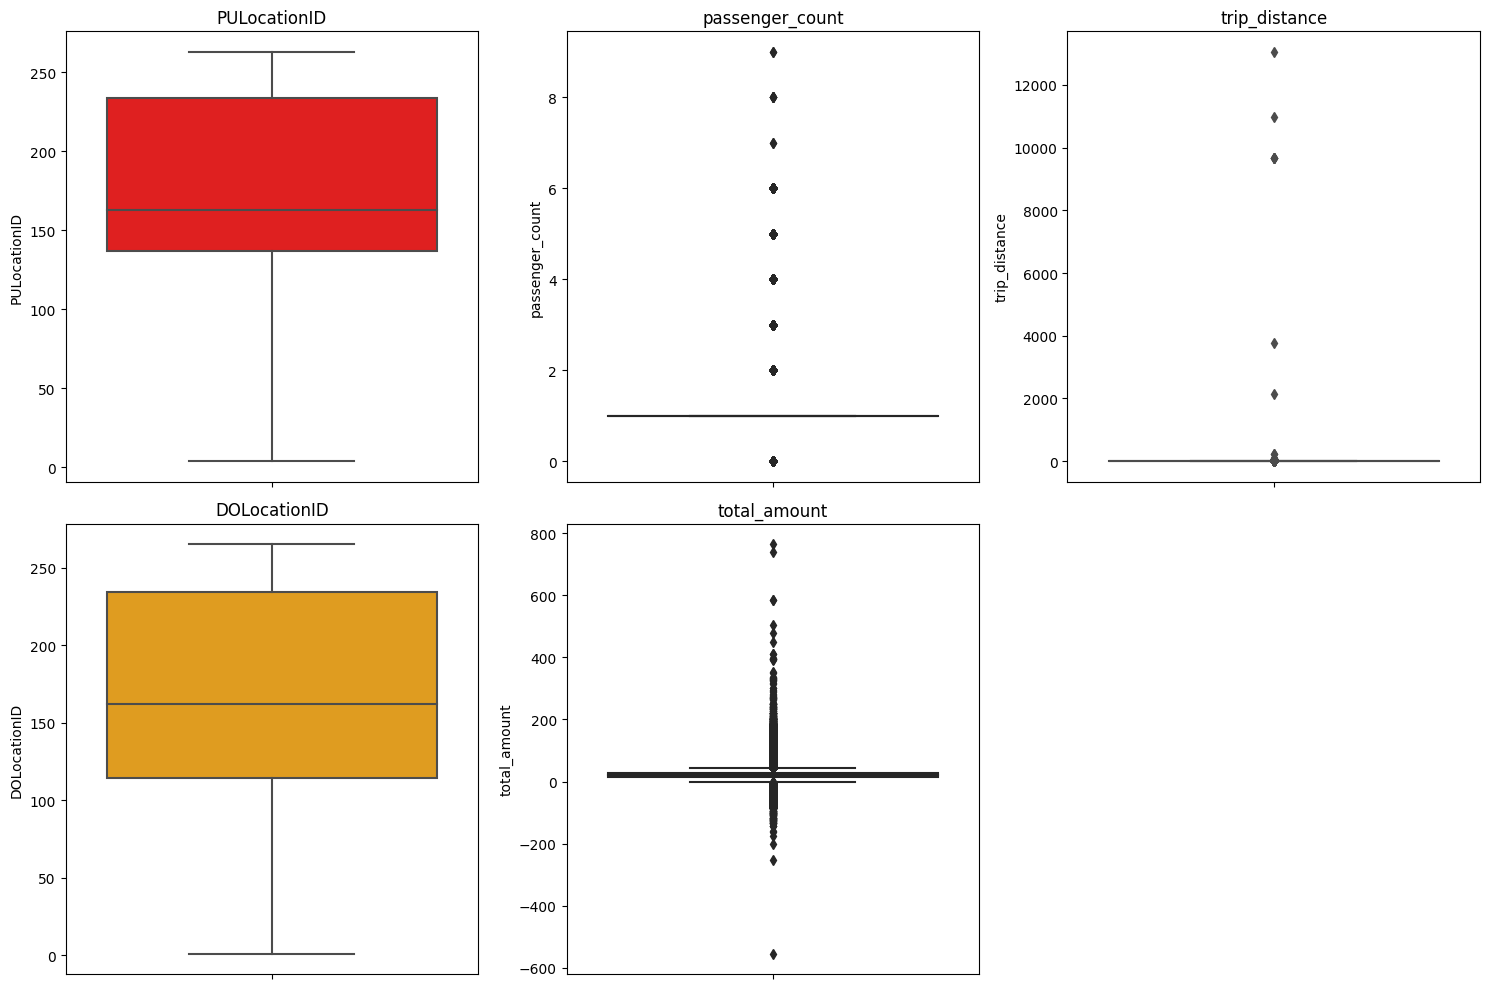

In [40]:
#Graficamos outliers
columnas = ['PULocationID', 'passenger_count',	'trip_distance', 'DOLocationID', 'total_amount']
	

colores = ['red', 'green', 'blue', 'orange', 'purple']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columnas):
    plt.subplot(2, 3, i+1)  
    sns.boxplot(y=taxis_2023[column], color=colores[i])
    plt.title(column)

plt.tight_layout()
plt.show()

In [41]:
#Observamos de que son esos ouliers
taxis_2023[taxis_2023['trip_distance']> 3000]

,PULocationID,Borough,Zone,service_zone,passenger_count,trip_distance,DOLocationID,total_amount,date_pickup,time_pickup,date_dropoff,time_dropoff
171316,48,Manhattan,Clinton East,Yellow Zone,1.0,9673.65,230,9.40,2023-04-04,1900-01-01 15:56:01,2023-04-04,1900-01-01 16:02:55
489554,79,Manhattan,East Village,Yellow Zone,1.0,13053.47,107,11.20,2023-05-24,1900-01-01 11:32:15,2023-05-24,1900-01-01 11:48:47
3773822,261,Manhattan,World Trade Center,Yellow Zone,1.0,9674.41,232,21.84,2023-07-06,1900-01-01 15:54:45,2023-07-06,1900-01-01 16:04:48
2127355,163,Manhattan,Midtown North,Yellow Zone,1.0,3768.50,48,25.20,2023-07-20,1900-01-01 14:06:10,2023-07-20,1900-01-01 14:24:40
136313,48,Manhattan,Clinton East,Yellow Zone,1.0,9673.71,161,20.64,2023-03-17,1900-01-01 19:50:15,2023-03-17,1900-01-01 20:00:51
1297993,140,Manhattan,Lenox Hill East,Yellow Zone,1.0,10961.43,263,15.10,2023-03-10,1900-01-01 19:12:22,2023-03-10,1900-01-01 19:18:55
1843346,161,Manhattan,Midtown Center,Yellow Zone,1.0,9674.01,68,20.20,2023-03-02,1900-01-01 15:45:34,2023-03-02,1900-01-01 16:00:45
1802492,161,Manhattan,Midtown Center,Yellow Zone,1.0,9672.96,161,23.16,2023-03-30,1900-01-01 18:28:12,2023-03-30,1900-01-01 18:42:13


In [42]:
taxis_2023[taxis_2023['total_amount']> 550]

,PULocationID,Borough,Zone,service_zone,passenger_count,trip_distance,DOLocationID,total_amount,date_pickup,time_pickup,date_dropoff,time_dropoff
2491657,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone,1.0,227.10,265,763.75,2023-07-15,1900-01-01 02:59:56,2023-07-15,1900-01-01 07:09:52
63108,42,Manhattan,Central Harlem North,Boro Zone,3.0,10.28,148,583.50,2023-01-12,1900-01-01 02:25:26,2023-01-12,1900-01-01 02:42:14
186305,48,Manhattan,Clinton East,Yellow Zone,1.0,4.50,4,738.78,2023-06-25,1900-01-01 23:33:42,2023-06-25,1900-01-01 23:50:21
260156,50,Manhattan,Clinton West,Yellow Zone,1.0,101.24,50,583.00,2023-07-30,1900-01-01 12:13:39,2023-07-30,1900-01-01 14:37:12


No haremos nada con los outliers ya que son reales y sirven para el analisis

In [43]:
#Observamos los datos de las columnas numericas
taxis_2023[['passenger_count', 'trip_distance', 'total_amount']].describe()

,passenger_count,trip_distance,total_amount
count,972002.000000,972002.000000,972002.000000
mean,1.362822,2.497143,23.174274
std,0.897782,28.403004,15.511567
min,0.000000,0.000000,-554.000000
25%,1.000000,1.000000,15.300000
50%,1.000000,1.630000,19.630000
75%,1.000000,2.700000,26.300000
max,9.000000,13053.470000,763.750000


<Axes: >

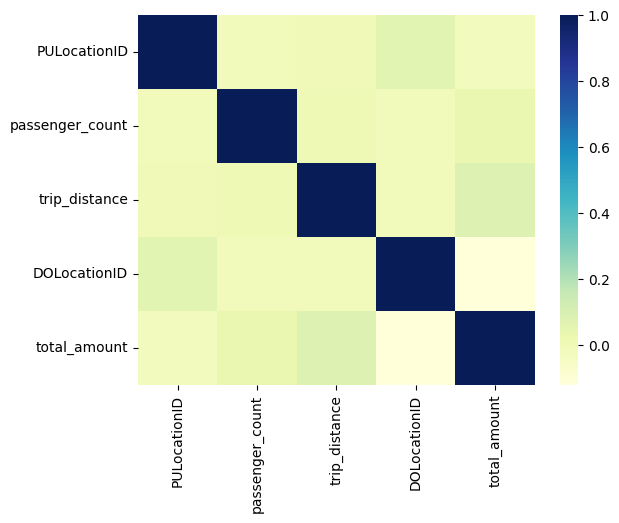

In [44]:
# Filtra solo las columnas numéricas
taxis_2023_num= taxis_2023.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = taxis_2023_num.corr()

# Crea el mapa de calor
sns.heatmap(correlation_matrix, annot=False, cmap="YlGnBu")

Realizamos una matriz de correlación y podemos observar que no hay fuerte correlación entre los datos.

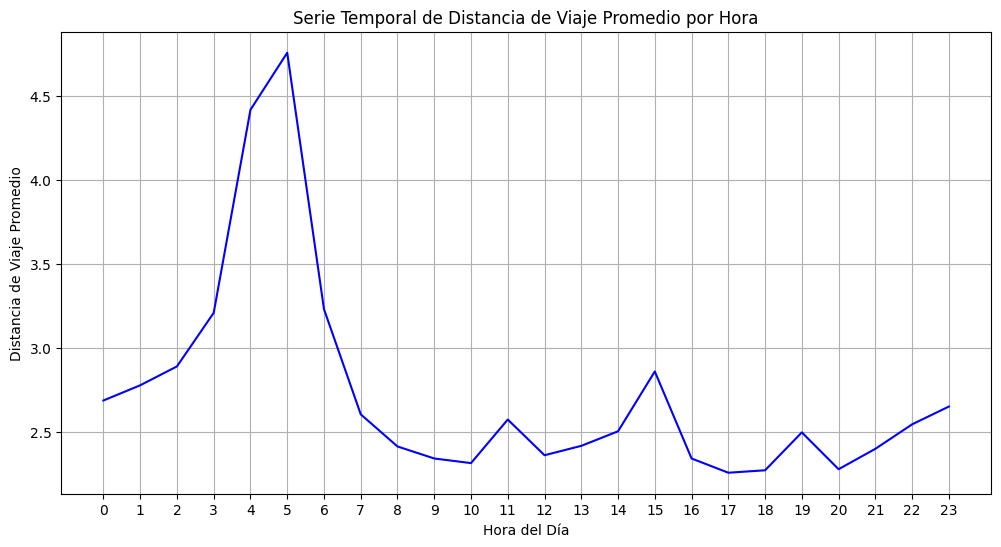

In [45]:
#Realizamos un grafico de lineas observando cual es la hora pormedio con la distancia promedio
taxis_2023['time_pickup'] = pd.to_datetime(taxis_2023['time_pickup'])

# Agrupa los datos por la hora del día y calcula el promedio de la distancia de viaje
hourly_avg_distance = taxis_2023.groupby(taxis_2023['time_pickup'].dt.hour)['trip_distance'].mean()

# Crea el gráfico de series temporales
plt.figure(figsize=(12, 6))
hourly_avg_distance.plot(kind='line', color='blue')
plt.title('Serie Temporal de Distancia de Viaje Promedio por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Distancia de Viaje Promedio')
plt.xticks(range(24))  # Etiquetas para cada hora del día
plt.grid(True)
plt.show()

Observamos que las 5am es el horario promedio con mas distancia. 

Al ser un dato extraño por el horario decidimos analozar cantidad de viajes en cada hora del dia


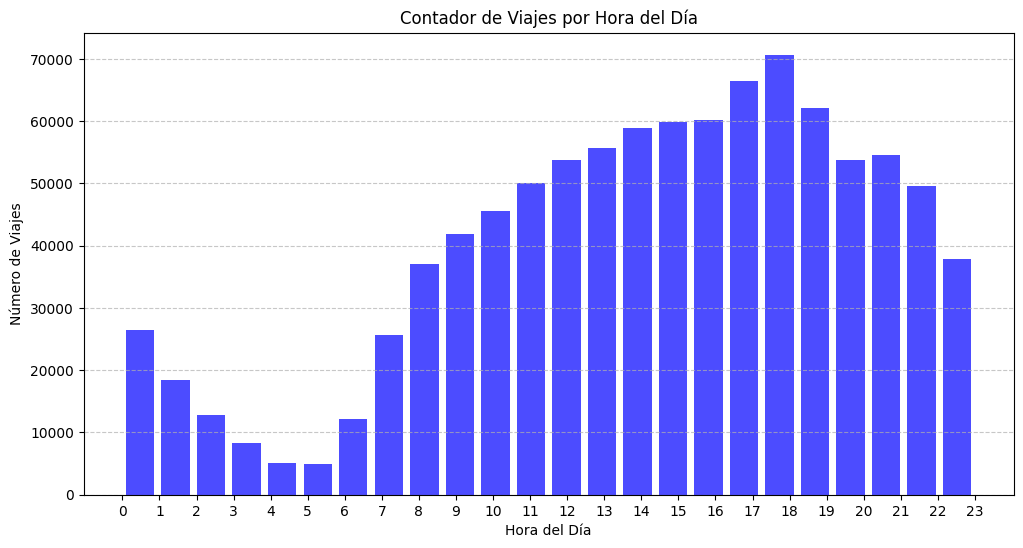

In [46]:
#Realizamos un grafico de barras contando los viajes por hora 
taxis_2023['time_pickup'] = pd.to_datetime(taxis_2023['time_pickup'])

# Extrae la hora de recogida
taxis_2023['hour_pickup'] = taxis_2023['time_pickup'].dt.hour

# Crea un histograma de viajes por hora
plt.figure(figsize=(12, 6))
plt.hist(taxis_2023['hour_pickup'], bins=24, rwidth=0.8, alpha=0.7, color='blue')
plt.title('Contador de Viajes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En este gráfico podemos observar que la hora pico en Manhatan es entre las 17hs a 19hs, y que a las 5am son viajes mas largos por eso en el gráfico anterior se genera un pico a esa hora. 

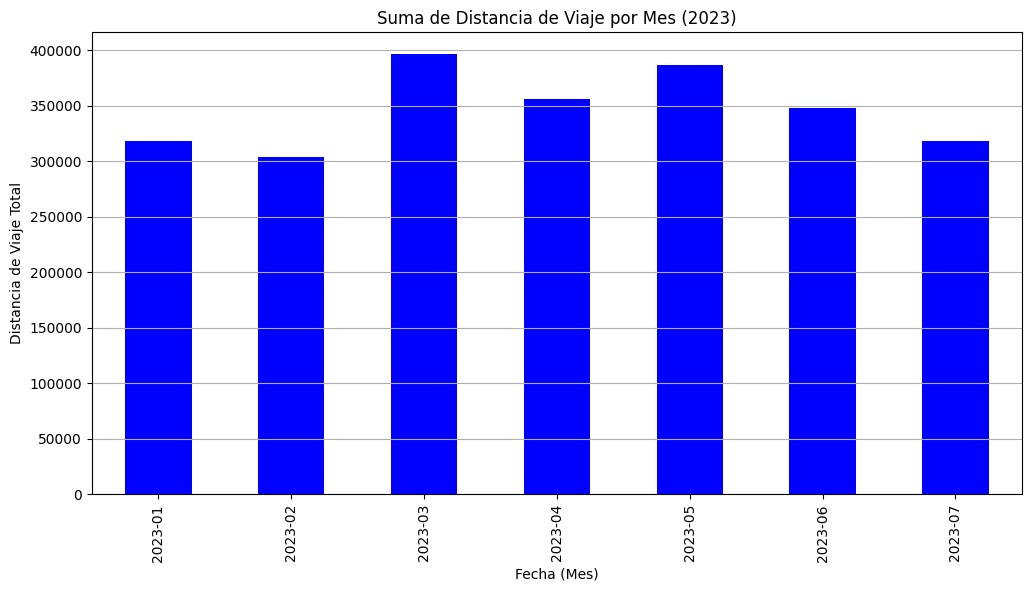

In [47]:
taxis_2023['date_pickup'] = pd.to_datetime(taxis_2023['date_pickup'])

# Filtra los datos para incluir solo el año 2023
taxis_2023_2023 = taxis_2023[taxis_2023['date_pickup'].dt.year == 2023]

# Agrupa los datos por mes y suma la distancia de viaje
monthly_total_distance = taxis_2023_2023.groupby(taxis_2023_2023['date_pickup'].dt.to_period('M'))['trip_distance'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
monthly_total_distance.plot(kind='bar', color='blue')
plt.title('Suma de Distancia de Viaje por Mes (2023)')
plt.xlabel('Fecha (Mes)')
plt.ylabel('Distancia de Viaje Total')
plt.grid(axis='y')
plt.show()

Se puede observar que la cantidad de viajes es regular en todos los meses, con un pico en el mes de abril por lo que analizaremos en mas detalle el mismo.

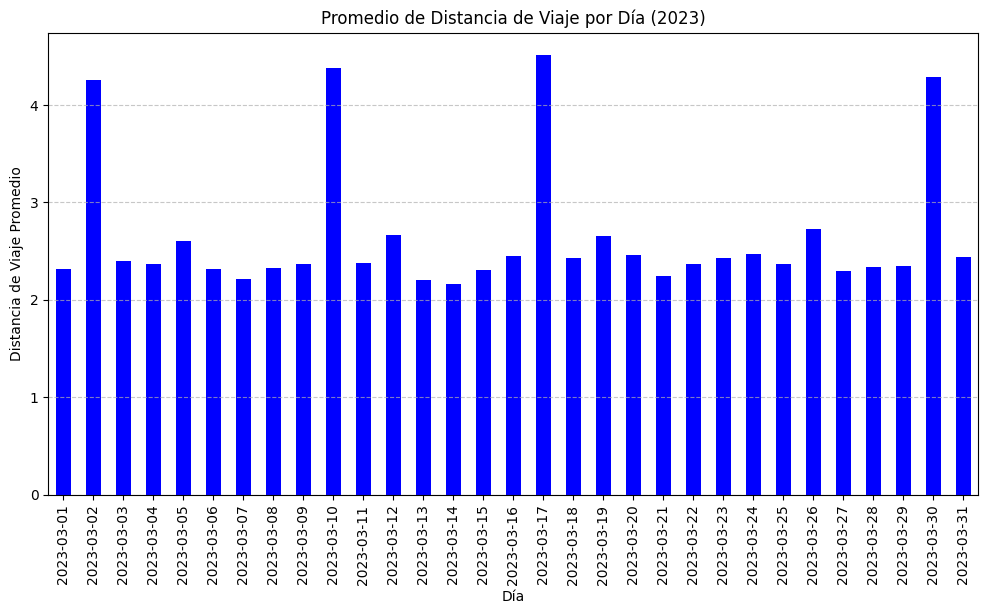

In [48]:
taxis_2023['date_pickup'] = pd.to_datetime(taxis_2023['date_pickup'])

# Filtra los datos para incluir solo el año 2023
taxis_2023_2023 = taxis_2023[taxis_2023['date_pickup'].dt.month == 3]

# Agrupa los datos por día y calcula el promedio de la distancia de viaje
daily_avg_distance = taxis_2023_2023.groupby(taxis_2023_2023['date_pickup'].dt.date)['trip_distance'].mean()

# Crea el gráfico de barras para mostrar el promedio de distancia de viaje por día
plt.figure(figsize=(12, 6))
daily_avg_distance.plot(kind='bar', color='blue')
plt.title('Promedio de Distancia de Viaje por Día (2023)')
plt.xlabel('Día')
plt.ylabel('Distancia de Viaje Promedio')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si es necesario
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analizamos en profundidad el mes de abril observando que los dias con mayor cantidad de viajes son dias del fin de semana. 

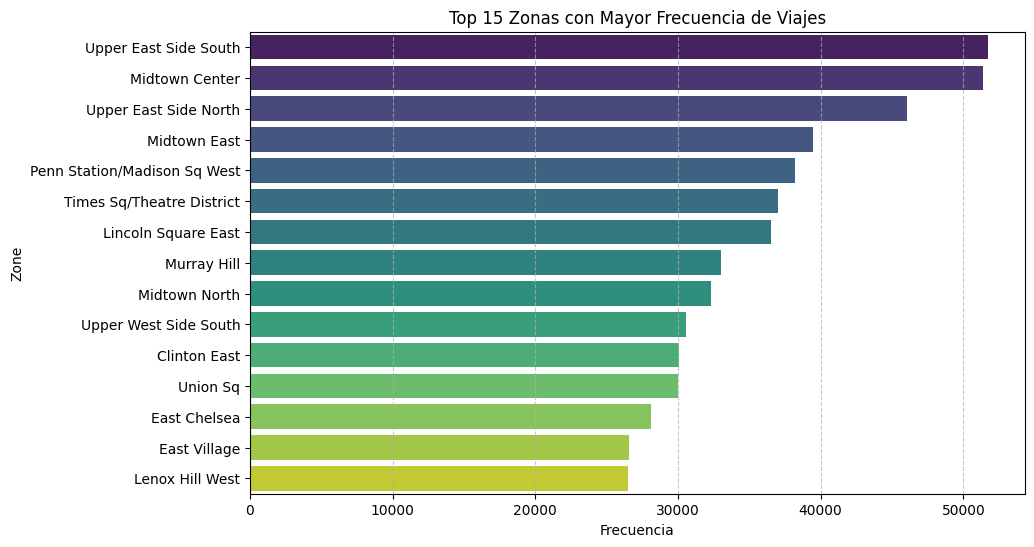

In [50]:
# Mostramos el top 15 de de las zonas con mayor frecuancia de viajes

# Contar la frecuencia de viajes en cada zona
zone_counts = taxis_2023['Zone'].value_counts()

# Seleccionar las 10 zonas principales
top_10_zones = zone_counts.head(15)

# Crear un gráfico de barras horizontal para las 10 zonas principales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_zones.values, y=top_10_zones.index, palette='viridis')
plt.title('Top 15 Zonas con Mayor Frecuencia de Viajes')
plt.xlabel('Frecuencia')
plt.ylabel('Zone')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()